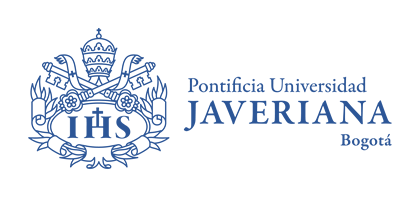


# Proyecto IA

## Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from itertools import product
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go

In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## Datos

### Datos IPC

In [3]:
# Leer un excel con pandas desde la fila 17
df_ipc = pd.read_excel('../data/IPC_Por_ciudad_IQY.xlsx',skiprows=range(0,2))
df_ipc

,Fecha,"Bogotá, D.C.",Cali,Medellín,Barranquilla,Armenia,Bucaramanga,Cartagena De Indias,Cúcuta,Florencia,...,Pasto,Pereira,Popayán,Riohacha,Santa Marta,Sincelejo,Tunja,Valledupar,Villavicencio,Otras Areas Urbanas
0,1979-01-31 00:00:00,0.54,0.66,0.55,0.59,NaN,0.51,NaN,NaN,NaN,...,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-02-28 00:00:00,0.55,0.66,0.55,0.61,NaN,0.54,NaN,NaN,NaN,...,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-03-31 00:00:00,0.57,0.69,0.57,0.63,NaN,0.56,NaN,NaN,NaN,...,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-04-30 00:00:00,0.58,0.7,0.58,0.65,NaN,0.56,NaN,NaN,NaN,...,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979-05-31 00:00:00,0.6,0.71,0.6,0.66,NaN,0.58,NaN,NaN,NaN,...,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,Fuente: Departamento Administrativo Nacional d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,(-) Indica que no hay dato disponible.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ciudades = df_ipc.columns[1:23].tolist()
ciudades

['Bogotá, D.C.',
 'Cali',
 'Medellín',
 'Barranquilla',
 'Armenia',
 'Bucaramanga',
 'Cartagena De Indias',
 'Cúcuta',
 'Florencia',
 'Ibagué',
 'Manizales',
 'Montería',
 'Neiva',
 'Pasto',
 'Pereira',
 'Popayán',
 'Riohacha',
 'Santa Marta',
 'Sincelejo',
 'Tunja',
 'Valledupar',
 'Villavicencio']

### Datos Temperatura

Se necesitan los datos de longitud y latitud de las ciudades en el dataframe del IPC para hallar los valores de tempartura, humedad y precipitación.

Los datos de coordenadas geográficas de longitud y latitud se obtuvieron de: https://www.geodatos.net/coordenadas/colombia/


In [5]:
city_coordinates = {
    'Bogotá, D.C.': {'lat': 4.60971, 'lon': -74.08175},
    'Cali': {'lat': 3.43722, 'lon': -76.5225},
    'Medellín': {'lat': 6.25184, 'lon': -75.56359},
    'Barranquilla': {'lat': 10.96854, 'lon': -74.78132},
    'Armenia': {'lat': 4.53389, 'lon': -75.68111},
    'Bucaramanga': {'lat': 7.12539, 'lon': -73.1198},
    'Cartagena De Indias': {'lat': 10.39972, 'lon': -75.51444},
    'Cúcuta': {'lat': 7.89391, 'lon': -72.50782},
    'Florencia': {'lat': 1.61438, 'lon': -75.60623},
    'Ibagué': {'lat': 4.43889, 'lon': -75.23222},
    'Manizales': {'lat': 5.06889, 'lon': -75.51738},
    'Montería': {'lat': 8.74798, 'lon': -75.88143},
    'Neiva': {'lat': 2.9273, 'lon': -75.28189},
    'Pasto': {'lat': 1.21361, 'lon': -77.28111},
    'Pereira': {'lat': 4.81333, 'lon': -75.69611},
    'Popayán': {'lat': 2.43823, 'lon': -76.61316},
    'Riohacha': {'lat': 11.54444, 'lon': -72.90722},
    'Santa Marta': {'lat': 11.24079, 'lon': -74.19904},
    'Sincelejo': {'lat': 9.30472, 'lon': -75.39778},
    'Tunja': {'lat': 5.53528, 'lon': -73.36778},
    'Valledupar': {'lat': 10.46314, 'lon': -73.25322},
    'Villavicencio': {'lat': 4.142, 'lon': -73.62664}
}

#período de tiempo
start_date = '20100101' #2010-01-01
end_date = '20240331' #2024-03-31

In [6]:
# Variables a recuperar (temperatura y precipitación)
parameters = ['T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR','T2M','WS10M']
parameters_subset = ','.join(parameters)

In [7]:
# Obtención de datos
for ciudad, coords in city_coordinates.items():
    lat, lon = coords['lat'], coords['lon']
    url = f'https://power.larc.nasa.gov/api/temporal/daily/point?parameters={parameters_subset}&community=SB&longitude={lon}&latitude={lat}&start={start_date}&end={end_date}&format=CSV'
    response = requests.get(url)
    data = response.text
    data_parts = data.split('-END HEADER-')
    actual_data = data_parts[1].strip()
    with open(f'../data/temp_diaria_{ciudad}.csv', 'w') as f:
        f.write(actual_data)
    df = pd.read_csv(f'../data/temp_diaria_{ciudad}.csv')
    print(f'Datos para {ciudad}:')
    print(df.head())

Datos para Bogotá, D.C.:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    26.90    12.31  54.62          0.0  18.78   1.82
1  2010   1   2    27.57    12.08  52.69          0.0  18.80   1.88
2  2010   1   3    27.47     9.58  48.19          0.0  17.93   2.55
3  2010   1   4    27.99    10.55  48.12          0.0  18.88   2.14
4  2010   1   5    27.99    12.64  52.38          0.0  20.31   1.54
Datos para Cali:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    24.81    10.76  72.06         0.09  17.06   1.38
1  2010   1   2    25.51    10.99  71.56         0.07  16.98   1.46
2  2010   1   3    25.72     8.23  67.56         0.01  16.57   2.05
3  2010   1   4    25.63     9.16  66.44         0.00  17.08   2.50
4  2010   1   5    23.83    10.87  74.81         0.00  17.05   1.45
Datos para Medellín:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    22.24    10.60  80.62         2.19

## Preparación de Datos

### Datos IPC

In [8]:
def convert_to_datetime(df_ipc, column):
    """
    Convierte una columna de un DataFrame a datetime y la establece como índice.
    Args:
        df_ipc (DataFrame): El DataFrame.
        column (str): El nombre de la columna a convertir.
    Returns:
        DataFrame: El DataFrame con la columna convertida a datetime y establecida como índice.
    """
    # Convertir la columna a datetime
    df_ipc[column] = pd.to_datetime(df_ipc[column])

    # Dejar solo el mes y el año
    df_ipc[column] = df_ipc[column].dt.to_period('M')

    # Establecer la columna como índice
    df_ipc.set_index(column, inplace=True)

    return df_ipc

Hacer un diccionario de cada ciudad con su IPC, IPC año corrido, IPC anual e IPC mensual. Todos desde el 2010

In [9]:
IPC = convert_to_datetime(df_ipc.iloc[:543, :-1].copy(), 'Fecha')
IPC.columns = [f"{col}" for col in IPC.columns]
IPC = IPC.loc['2010':]

IPC_var_anio_corr = convert_to_datetime(df_ipc.iloc[546:1089, :-1].copy(), 'Fecha')
IPC_var_anio_corr.columns = [f"{col}" for col in IPC_var_anio_corr.columns]
IPC_var_anio_corr = IPC_var_anio_corr.loc["2010":]

IPC_anual = convert_to_datetime(df_ipc.iloc[1092:1635, :-1].copy(), 'Fecha')
IPC_anual.columns = [f"{col}" for col in IPC_anual.columns]
IPC_anual = IPC_anual.loc["2010":]

IPC_mensual = convert_to_datetime(df_ipc.iloc[1638:2181, :-1].copy(), 'Fecha')
IPC_mensual.columns = [f"{col}" for col in IPC_mensual.columns]
IPC_mensual = IPC_mensual.loc["2010":]

In [10]:
IPC_mensual

,"Bogotá, D.C.",Cali,Medellín,Barranquilla,Armenia,Bucaramanga,Cartagena De Indias,Cúcuta,Florencia,Ibagué,...,Neiva,Pasto,Pereira,Popayán,Riohacha,Santa Marta,Sincelejo,Tunja,Valledupar,Villavicencio
Fecha,,,,,,,,,,,,,,,,,,,,,
2010-01,0.72,0.61,0.85,0.51,0.46,0.87,0.4,0.38,0.53,0.96,...,0.58,0.54,0.52,0.46,0.71,0.64,0.39,0.41,0.86,0.76
2010-02,0.82,0.56,0.95,0.97,0.53,1.19,0.88,0.78,0.62,0.72,...,0.77,0.5,0.66,1.47,0.91,0.96,0.87,1.03,0.98,1.08
2010-03,0.25,0.35,0.09,0.11,0.28,0.41,-0.06,0.8,0.39,0.42,...,0.08,0.45,0.41,-0.05,0.26,0.32,0.39,0.47,0.3,0.42
2010-04,0.28,0.55,0.5,0.83,0.66,0.76,0.74,0.82,0.37,0.6,...,0.39,0.25,0.23,0.34,0.96,0.83,0.69,0.09,1.17,0.49
2010-05,0.23,0.03,0.03,-0.01,-0.01,-0.13,0.26,-0.27,-0.03,0.03,...,0.37,-0.05,0.05,0.25,-0.58,-0.28,-0.17,-0.28,-0.27,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11,0.29,0.14,0.57,1.38,0.67,0.62,0.71,0.62,0.41,-0.07,...,0.23,0.54,0.57,0.11,1.47,2.16,0.64,0.07,0.96,0.13
2023-12,0.48,0.22,0.54,0.3,0.2,0.47,0.86,0.41,0.12,0.45,...,0.21,0.57,0.29,-0.2,0.34,0.19,0.45,0.39,1.33,0.51
2024-01,0.68,1.06,1.56,0.57,1.04,1.15,0.93,0.69,0.7,0.87,...,1.01,0.56,0.82,0.8,1.36,0.8,1.22,0.89,1.41,0.79


In [11]:
IPC_mensual.dtypes

Bogotá, D.C.           object
Cali                   object
Medellín               object
Barranquilla           object
Armenia                object
Bucaramanga            object
Cartagena De Indias    object
Cúcuta                 object
Florencia              object
Ibagué                 object
Manizales              object
Montería               object
Neiva                  object
Pasto                  object
Pereira                object
Popayán                object
Riohacha               object
Santa Marta            object
Sincelejo              object
Tunja                  object
Valledupar             object
Villavicencio          object
dtype: object

In [12]:
# convertir a numerico
IPC_mensual = IPC_mensual.applymap(pd.to_numeric)

In [13]:
IPC_mensual.describe()

,"Bogotá, D.C.",Cali,Medellín,Barranquilla,Armenia,Bucaramanga,Cartagena De Indias,Cúcuta,Florencia,Ibagué,...,Neiva,Pasto,Pereira,Popayán,Riohacha,Santa Marta,Sincelejo,Tunja,Valledupar,Villavicencio
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.393392,0.395965,0.423801,0.439942,0.405439,0.424795,0.403684,0.414737,0.385789,0.383918,...,0.387251,0.385205,0.397953,0.402749,0.417310,0.414620,0.398947,0.384211,0.422456,0.370117
std,0.419751,0.507853,0.383053,0.439112,0.422163,0.430920,0.428182,0.516234,0.546110,0.478446,...,0.517778,0.443216,0.592061,0.584700,0.531791,0.489947,0.458899,0.477297,0.476367,0.437158
min,-0.530000,-1.220000,-0.340000,-0.350000,-0.290000,-0.470000,-0.310000,-0.880000,-1.830000,-1.620000,...,-1.700000,-1.470000,-3.550000,-1.380000,-0.970000,-0.970000,-0.860000,-0.720000,-1.170000,-1.270000
25%,0.120000,0.085000,0.140000,0.115000,0.145000,0.125000,0.100000,0.080000,0.095000,0.095000,...,0.060000,0.140000,0.085000,0.100000,0.100000,0.120000,0.110000,0.080000,0.115000,0.080000
50%,0.290000,0.370000,0.350000,0.380000,0.310000,0.340000,0.360000,0.370000,0.310000,0.310000,...,0.370000,0.340000,0.310000,0.310000,0.320000,0.330000,0.340000,0.310000,0.350000,0.350000
75%,0.610000,0.635000,0.605000,0.665000,0.595000,0.700000,0.675000,0.725000,0.615000,0.645000,...,0.615000,0.570000,0.575000,0.575000,0.705000,0.685000,0.685000,0.610000,0.700000,0.570000
max,1.890000,2.770000,1.780000,1.940000,2.110000,1.970000,1.740000,2.090000,4.020000,2.390000,...,2.470000,1.880000,4.230000,4.500000,2.370000,2.160000,2.160000,2.120000,1.810000,2.220000


### Datos Temperatura

Datos promedio mensuales de cada valor de temperatura registrado diariamente en las ciudades.

In [15]:
for ciudad in city_coordinates.keys():
    df = pd.read_csv(f'../data/temp_diaria_{ciudad}.csv')
    df['Fecha'] = pd.to_datetime(df[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1))
    df = df.set_index('Fecha')
    df = df.drop(columns=['YEAR', 'MO', 'DY'])
    df = df.resample('M').mean()
    df.index = df.index.to_period('M')
    print(f'Datos para {ciudad}:')
    print(df.head())

Datos para Bogotá, D.C.:
           T2M_MAX    T2M_MIN       RH2M  PRECTOTCORR        T2M     WS10M
Fecha                                                                     
2010-01  28.290323  14.572903  56.022581     0.420645  20.783871  2.373548
2010-02  28.751429  16.600357  61.676429     1.567857  21.900000  1.888571
2010-03  27.279032  16.360000  67.231613     3.154516  21.149677  1.497742
2010-04  24.373000  15.902000  80.660667     8.706333  19.568000  1.303667
2010-05  23.441613  15.351613  82.858065     8.090323  18.984839  1.532258
Datos para Cali:
           T2M_MAX    T2M_MIN       RH2M  PRECTOTCORR        T2M     WS10M
Fecha                                                                     
2010-01  24.247419  12.430000  74.711613     0.283548  17.611613  2.027419
2010-02  24.039286  13.996786  77.885714     1.324643  18.156429  1.772500
2010-03  23.913548  13.743226  77.193226     1.023226  18.076774  1.758387
2010-04  22.143000  13.842333  84.592000     7.190667  17.

### Unir Datos del IPC Mensual con los datos de temperatura

In [17]:
dict_ciudades = {}
for ciudad in city_coordinates.keys():
    df = pd.read_csv(f'../data/temp_diaria_{ciudad}.csv')
    df['Fecha'] = pd.to_datetime(df[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1))
    df = df.set_index('Fecha')
    df = df.drop(columns=['YEAR', 'MO', 'DY'])
    df = df.resample('M').mean()
    df.index = df.index.to_period('M')
    df_ciudades = pd.concat([IPC_mensual[[ciudad]], df], axis=1)
    df_ciudades = df_ciudades.rename(columns={ciudad: 'IPC_mensual'})
    dict_ciudades[ciudad] = df_ciudades
    print(dict_ciudades[ciudad])

         IPC_mensual    T2M_MAX    T2M_MIN       RH2M  PRECTOTCORR        T2M  \
Fecha                                                                           
2010-01         0.72  28.290323  14.572903  56.022581     0.420645  20.783871   
2010-02         0.82  28.751429  16.600357  61.676429     1.567857  21.900000   
2010-03         0.25  27.279032  16.360000  67.231613     3.154516  21.149677   
2010-04         0.28  24.373000  15.902000  80.660667     8.706333  19.568000   
2010-05         0.23  23.441613  15.351613  82.858065     8.090323  18.984839   
...              ...        ...        ...        ...          ...        ...   
2023-11         0.29  23.898333  15.323667  81.342333     5.673667  19.179333   
2023-12         0.48  24.404194  15.560968  80.679032     4.315161  19.542903   
2024-01         0.68  26.288387  14.625806  71.830645     0.619355  20.018710   
2024-02         1.37  24.270690  15.894138  83.167931    13.909310  19.672414   
2024-03         0.82  24.481

In [18]:
#Guardar en excel donde cada pagina es una ciudad el dict_ciudades
with pd.ExcelWriter('../data/datos_ciudades.xlsx') as writer:
    for ciudad, df in dict_ciudades.items():
        df.to_excel(writer, sheet_name=ciudad)

In [19]:
dict_ciudades['Bogotá, D.C.']

,IPC_mensual,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M
Fecha,,,,,,,
2010-01,0.72,28.290323,14.572903,56.022581,0.420645,20.783871,2.373548
2010-02,0.82,28.751429,16.600357,61.676429,1.567857,21.900000,1.888571
2010-03,0.25,27.279032,16.360000,67.231613,3.154516,21.149677,1.497742
2010-04,0.28,24.373000,15.902000,80.660667,8.706333,19.568000,1.303667
2010-05,0.23,23.441613,15.351613,82.858065,8.090323,18.984839,1.532258
...,...,...,...,...,...,...,...
2023-11,0.29,23.898333,15.323667,81.342333,5.673667,19.179333,1.609667
2023-12,0.48,24.404194,15.560968,80.679032,4.315161,19.542903,1.663548
2024-01,0.68,26.288387,14.625806,71.830645,0.619355,20.018710,2.215484


## Exploración y visualización de datos

In [20]:
for ciudad in ciudades:
    print(dict_ciudades[ciudad].describe())

       IPC_mensual     T2M_MAX     T2M_MIN        RH2M  PRECTOTCORR  \
count   171.000000  171.000000  171.000000  171.000000   171.000000   
mean      0.393392   23.776808   14.483519   79.316030     5.130593   
std       0.419751    1.170971    0.809188    4.715146     2.657664   
min      -0.530000   21.421000   12.488710   56.022581     0.420645   
25%       0.120000   23.028823   13.888871   77.822425     3.360468   
50%       0.290000   23.654839   14.475161   79.901290     4.790323   
75%       0.610000   24.239793   15.085473   82.265124     6.485892   
max       1.890000   28.751429   16.616774   87.984333    17.220645   

              T2M       WS10M  
count  171.000000  171.000000  
mean    18.696227    1.762374  
std      0.759504    0.385097  
min     17.334194    1.241333  
25%     18.149516    1.471000  
50%     18.578710    1.642258  
75%     19.144887    1.982940  
max     21.900000    2.941667  
       IPC_mensual     T2M_MAX     T2M_MIN        RH2M  PRECTOTCORR  \
c

### Manejando valores nulos

In [21]:
print(dict_ciudades[ciudad].isnull().sum())

IPC_mensual    0
T2M_MAX        0
T2M_MIN        0
RH2M           0
PRECTOTCORR    0
T2M            0
WS10M          0
dtype: int64


### Validando duplicados

In [22]:
for ciudad in ciudades:
    print(dict_ciudades[ciudad][dict_ciudades[ciudad].duplicated()])

Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []


Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Columns: [IPC_mensual, T2M_MAX, T2M_MIN, RH2M, PRECTOTCORR, T2M, WS10M]
Index: []
Empty DataFrame
Colu

### Análisis de distribución

In [23]:
def plot_boxplot(df):
    """
    Genera un boxplot de un DataFrame.
    Args:
        df (DataFrame): El DataFrame.
    """
    int_cols = df.select_dtypes(exclude='object').columns 
    plt.figure(figsize=(20,20))
    for i, col in enumerate(int_cols, 1):
        plt.subplot(4, 2, i)
        sns.boxplot(data=df, y=col)
    plt.tight_layout()
    plt.show()

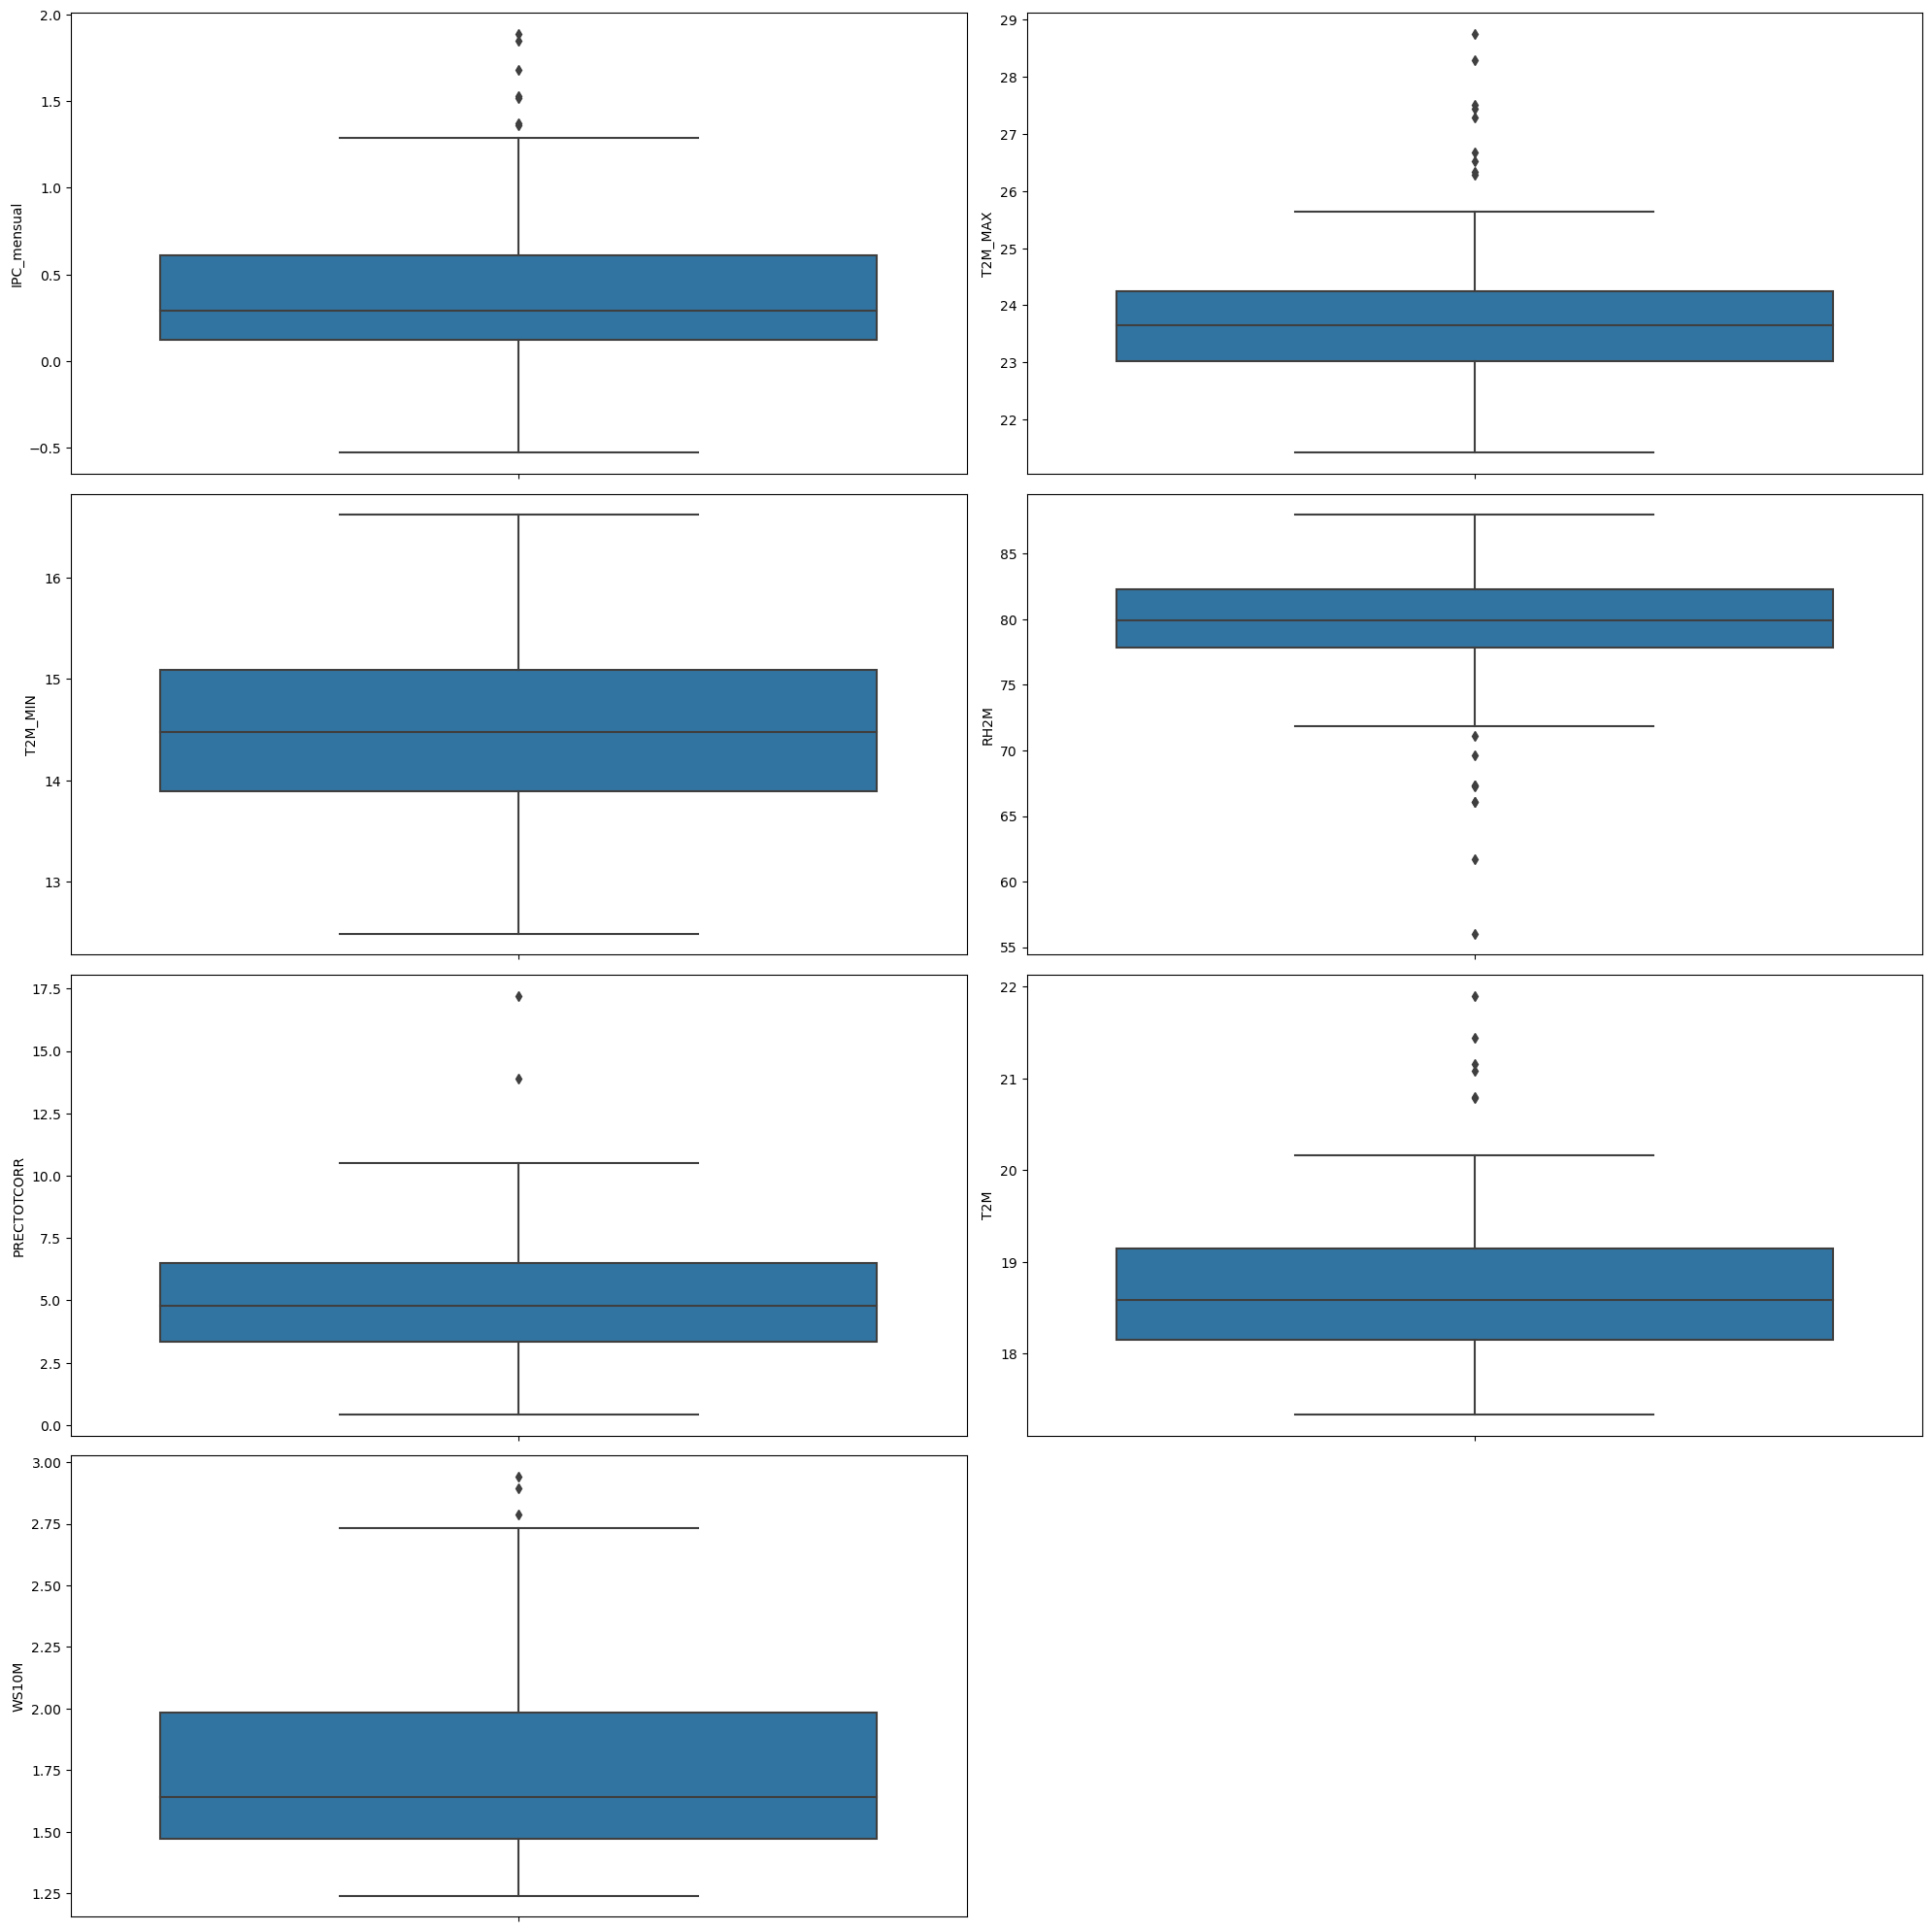

In [24]:
plot_boxplot(dict_ciudades['Bogotá, D.C.'])

### Correlación

In [25]:
def plot_heatmap(df, nom_ciudad):
    """
    Genera un heatmap de correlación de un DataFrame utilizando Plotly.
    
    Args:
        df (DataFrame): El DataFrame.
        nom_ciudad (str): Nombre de la ciudad.
    """
    corr_matrix = df.corr()
    
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='RdBu',
        zmid=0,
        zmin=-1,
        zmax=1,
        text=corr_matrix.values,
        texttemplate="%{text:.2f}",
        textfont=dict(size=12),
        hovertemplate='Correlación entre %{x} y %{y}: %{text:.2f}<extra></extra>'
    ))
    
    fig.update_layout(
        title=f'Heatmap de Correlación de {nom_ciudad}',
        xaxis_title='Variables',
        yaxis_title='Variables',
        width=800,
        height=800
    )
    
    return fig

In [26]:
plot_heatmap(dict_ciudades['Bogotá, D.C.'],'Bogotá, D.C.')

### Histograma de los datos

In [27]:
def plot_histogram(df):
    """
    Genera un histograma de un DataFrame.
    Args:
        df (DataFrame): El DataFrame.
    """
    int_cols = df.select_dtypes(exclude='object').columns 
    plt.figure(figsize=(20,20))
    for i, col in enumerate(int_cols, 1):
        plt.subplot(4, 2, i)
        sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.show()

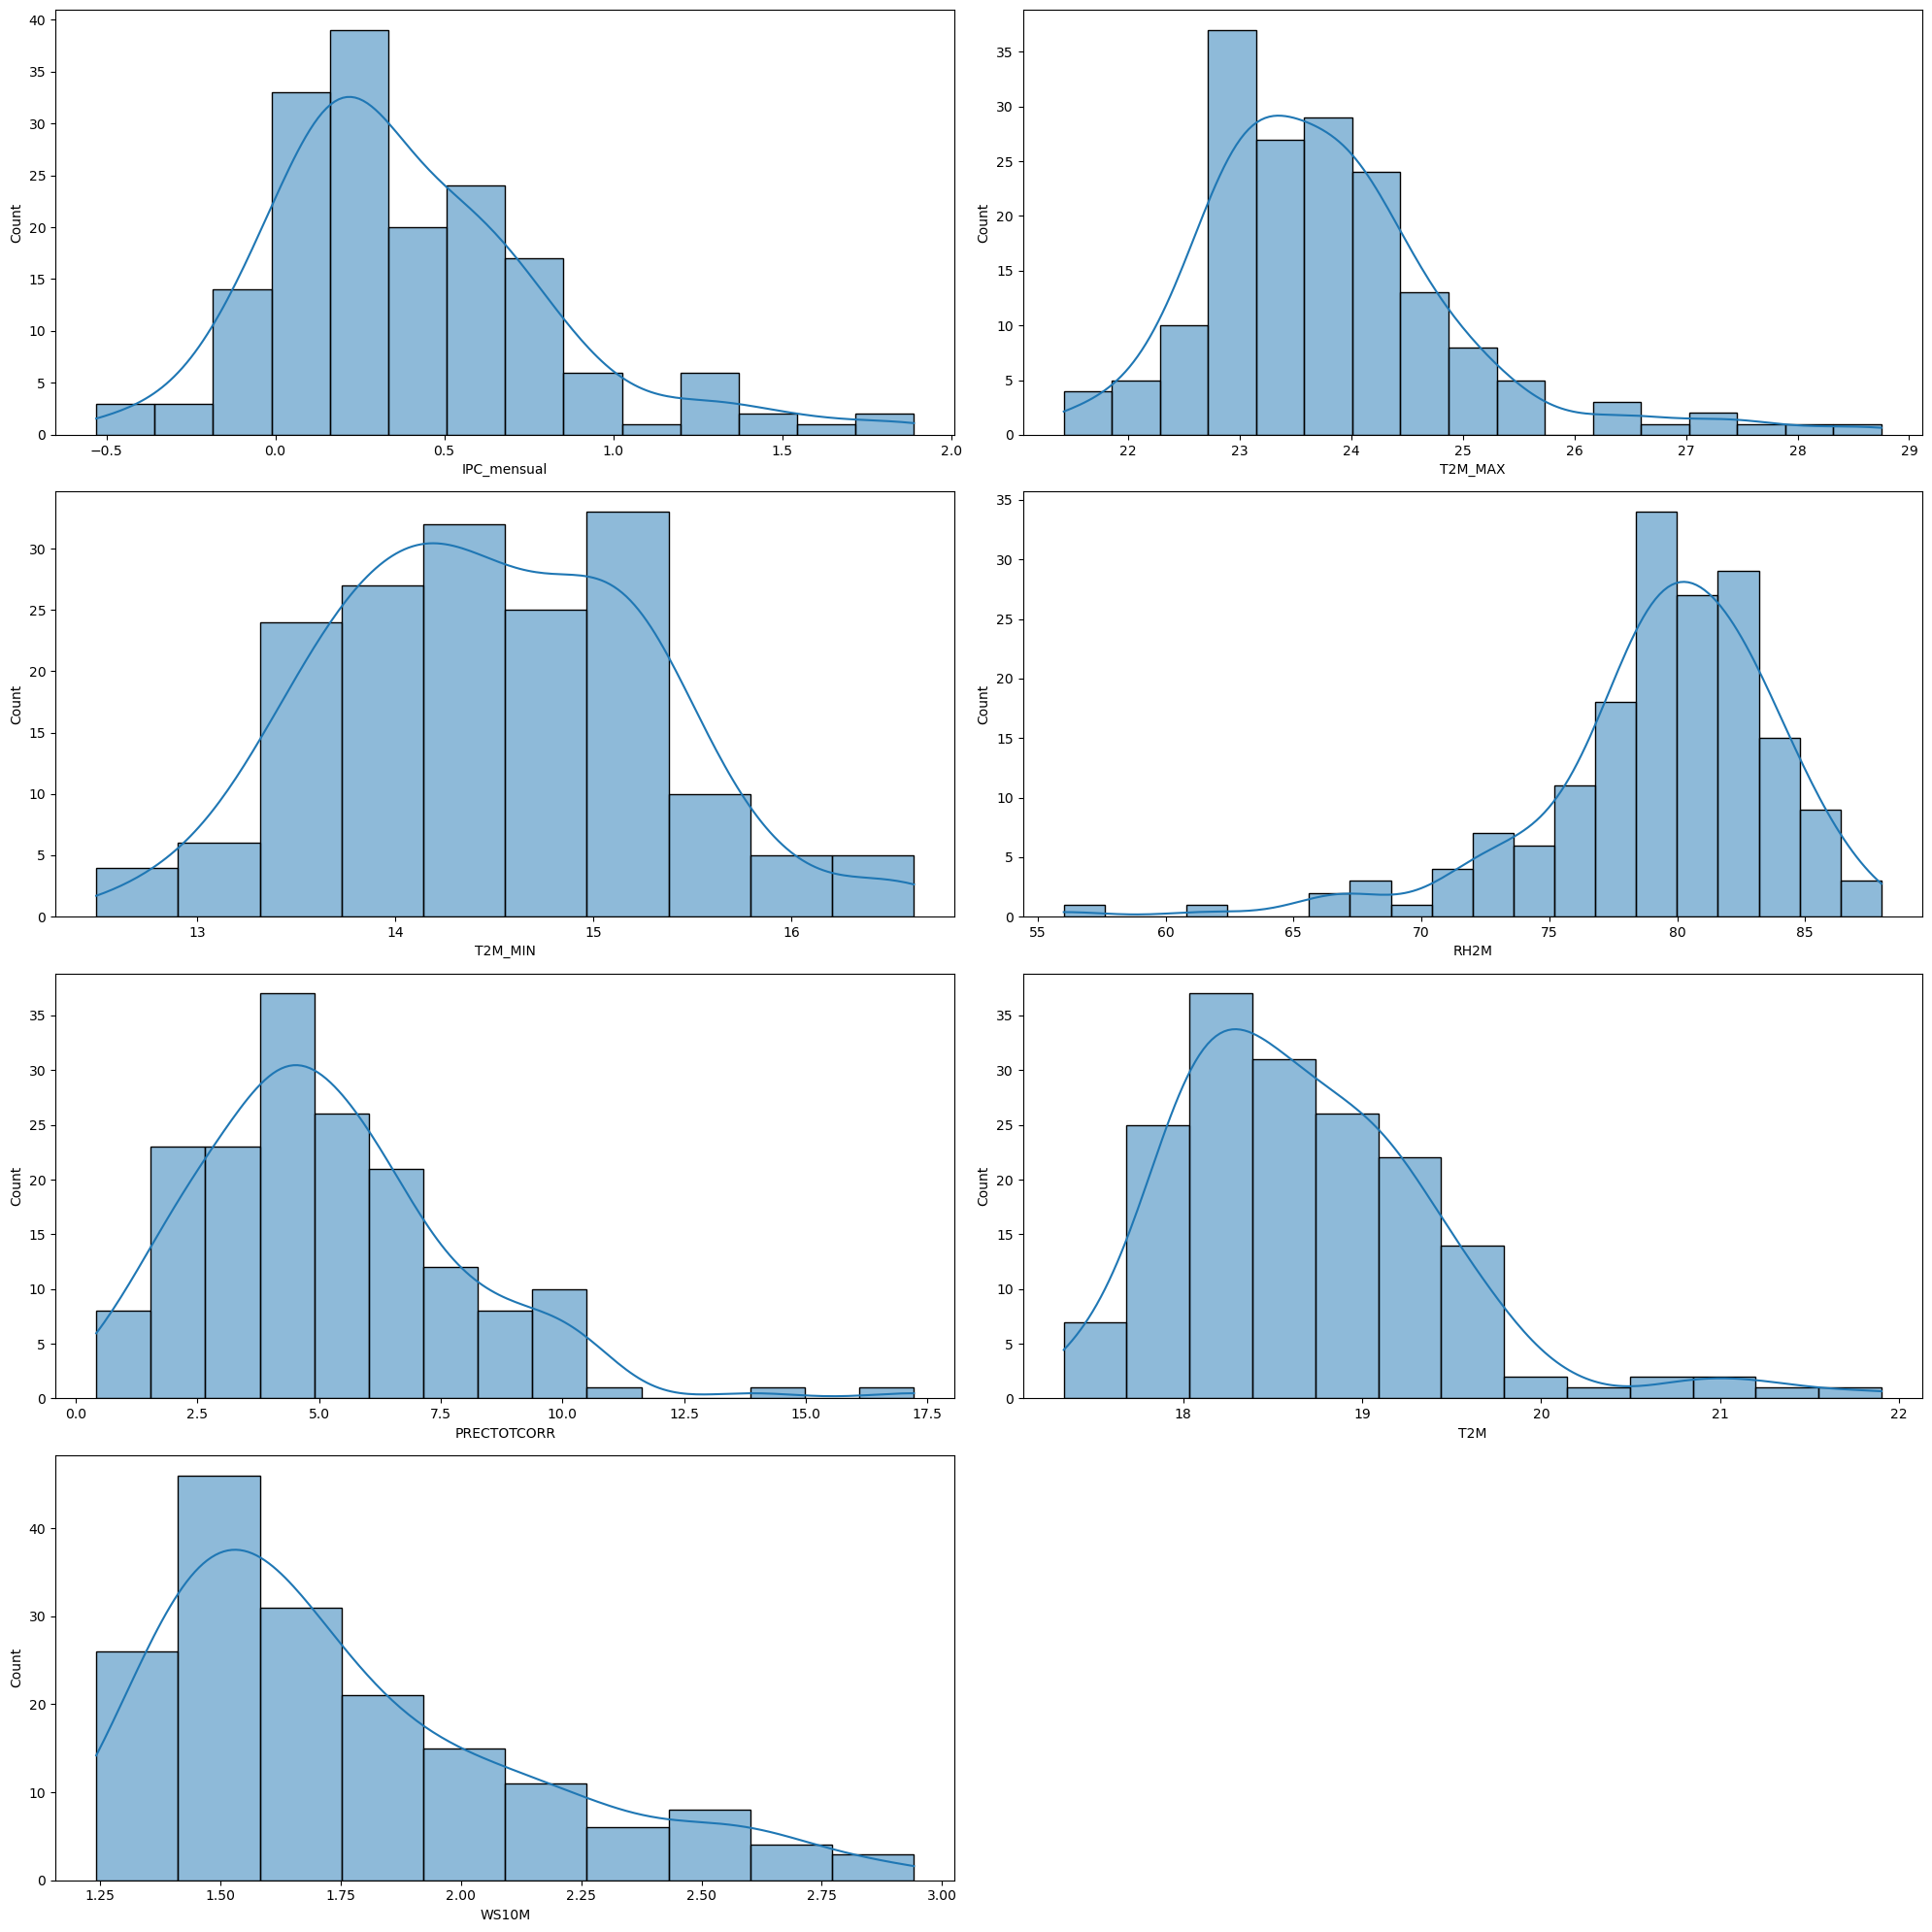

In [28]:
plot_histogram(dict_ciudades['Bogotá, D.C.'])

### Serie temporal de IPC Mensual

In [29]:
def plot_IPC(df):
    """
    Genera un gráfico de IPC de un DataFrame.
    Args:
        df (DataFrame): El DataFrame.
    """
    fechas = df.index.astype(str).tolist()
    plt.figure(figsize=(15, 5))
    plt.plot(fechas, df.iloc[:, 0])
    plt.title(f'Serie Temporal de IPC Mensual - {df.columns[0]}')
    plt.xlabel('Fecha')
    plt.ylabel('IPC Mensual')
    plt.show()

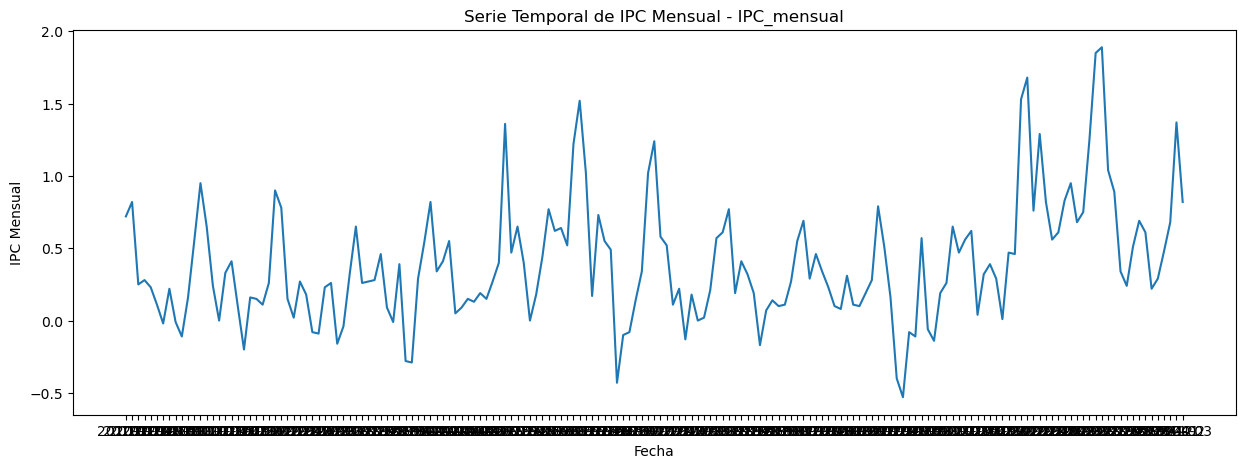

In [30]:
plot_IPC(dict_ciudades['Bogotá, D.C.'])

## Estandarizar datos

In [31]:
def standardize(df):
    """
    Estandariza un DataFrame.
    Args:
        df (DataFrame): El DataFrame.
    Returns:
        DataFrame: El DataFrame estandarizado.
    """
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    return df_scaled

In [32]:
dict_ciudades['Bogotá, D.C.']

,IPC_mensual,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M
Fecha,,,,,,,
2010-01,0.72,28.290323,14.572903,56.022581,0.420645,20.783871,2.373548
2010-02,0.82,28.751429,16.600357,61.676429,1.567857,21.900000,1.888571
2010-03,0.25,27.279032,16.360000,67.231613,3.154516,21.149677,1.497742
2010-04,0.28,24.373000,15.902000,80.660667,8.706333,19.568000,1.303667
2010-05,0.23,23.441613,15.351613,82.858065,8.090323,18.984839,1.532258
...,...,...,...,...,...,...,...
2023-11,0.29,23.898333,15.323667,81.342333,5.673667,19.179333,1.609667
2023-12,0.48,24.404194,15.560968,80.679032,4.315161,19.542903,1.663548
2024-01,0.68,26.288387,14.625806,71.830645,0.619355,20.018710,2.215484


In [33]:
df_Bogota_scaled = standardize(dict_ciudades['Bogotá, D.C.'])
df_Bogota_scaled = pd.DataFrame(df_Bogota_scaled, columns=dict_ciudades['Bogotá, D.C.'].columns)
df_Bogota_scaled

,IPC_mensual,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M
0,0.780385,3.865825,0.110786,-4.954642,-1.777418,2.756768,1.591730
1,1.019322,4.260762,2.623684,-3.752038,-1.344489,4.230635,0.328666
2,-0.342615,2.999655,2.325777,-2.570421,-0.745723,3.239822,-0.689201
3,-0.270934,0.510638,1.758115,0.286011,1.349396,1.151191,-1.194647
4,-0.390402,-0.287095,1.075946,0.753410,1.116929,0.381117,-0.599308
...,...,...,...,...,...,...,...
166,-0.247040,0.104086,1.041309,0.431006,0.204943,0.637950,-0.397707
167,0.206938,0.537356,1.335428,0.289918,-0.307724,1.118050,-0.257379
168,0.684811,2.151167,0.176356,-1.592182,-1.702430,1.746360,1.180070
169,2.333471,0.423010,1.748371,0.819320,3.312871,1.289071,-0.191183


## Análisis de Clustering con DBSCAN

### Encontrar los híper-parámetros

distancias ordenadas de todos los puntos.

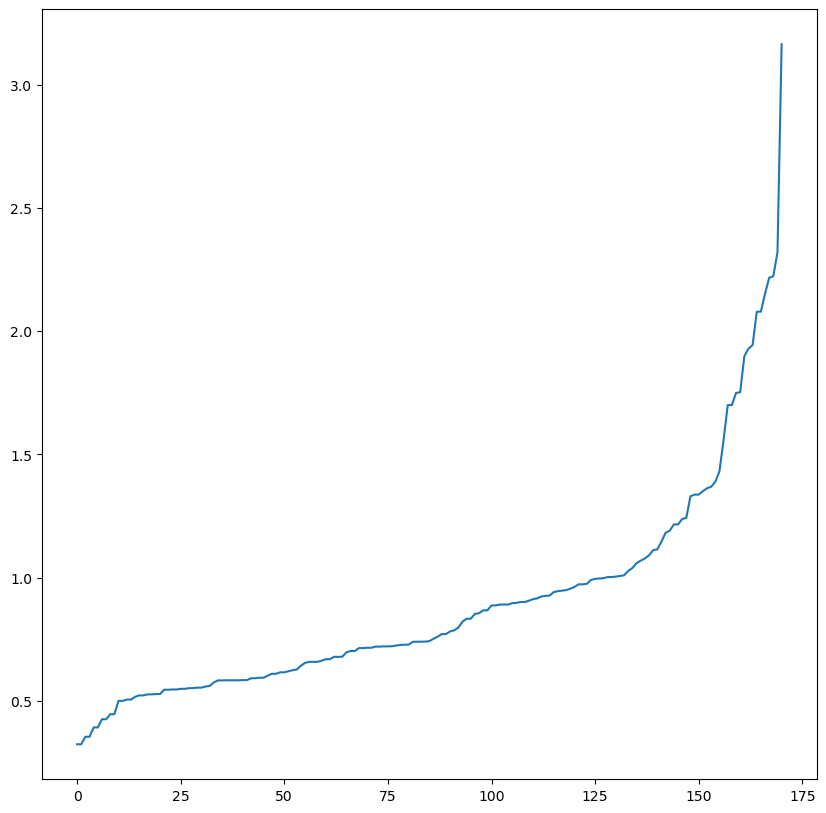

In [34]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_Bogota_scaled)
dists, indices = neighbors_fit.kneighbors(df_Bogota_scaled)

dists = np.sort(dists, axis=0)
dists = dists[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(dists)

In [35]:
epsilon_values = np.arange(1, 2.0, 0.05)
samples = np.arange(3,12)

In [36]:
dbscan_paramns = list(product(epsilon_values, samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_Bogota_scaled)
    try:
        sil_score.append(silhouette_score(df_Bogota_scaled,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [37]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Epsilon','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [38]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Epsilon', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Epsilon', index='Min_samples')

Para diferentes parámetros, cuál es su indice de silueta.

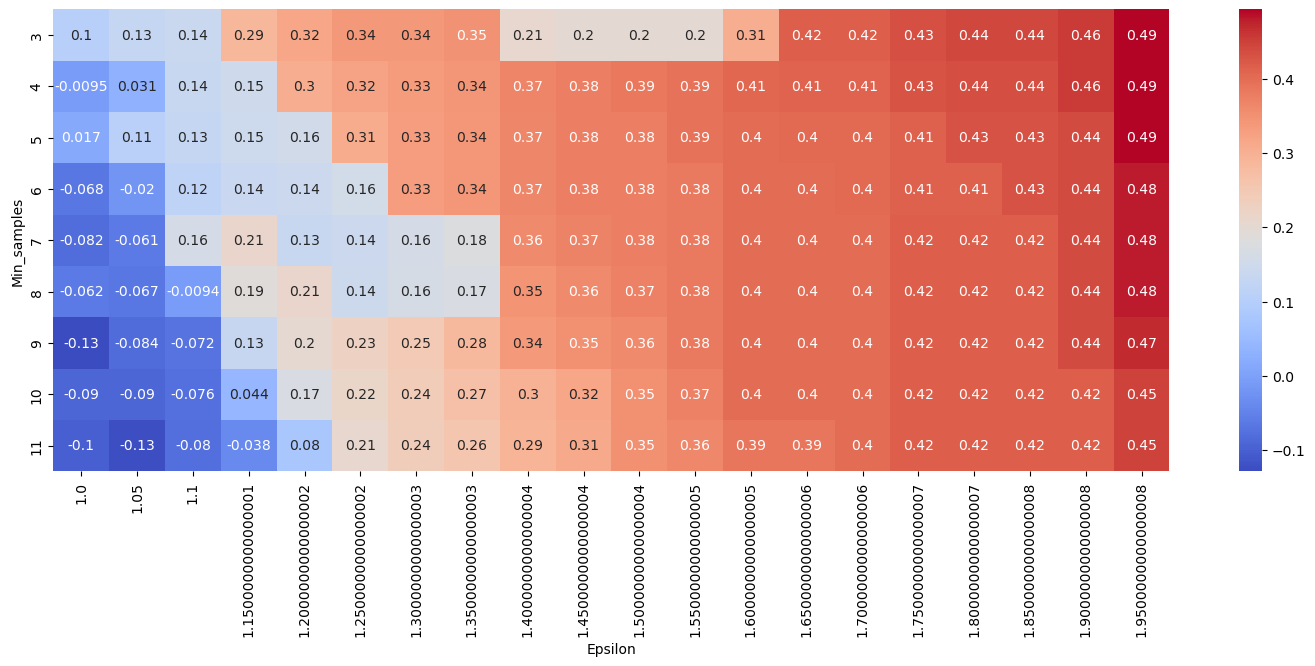

In [39]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

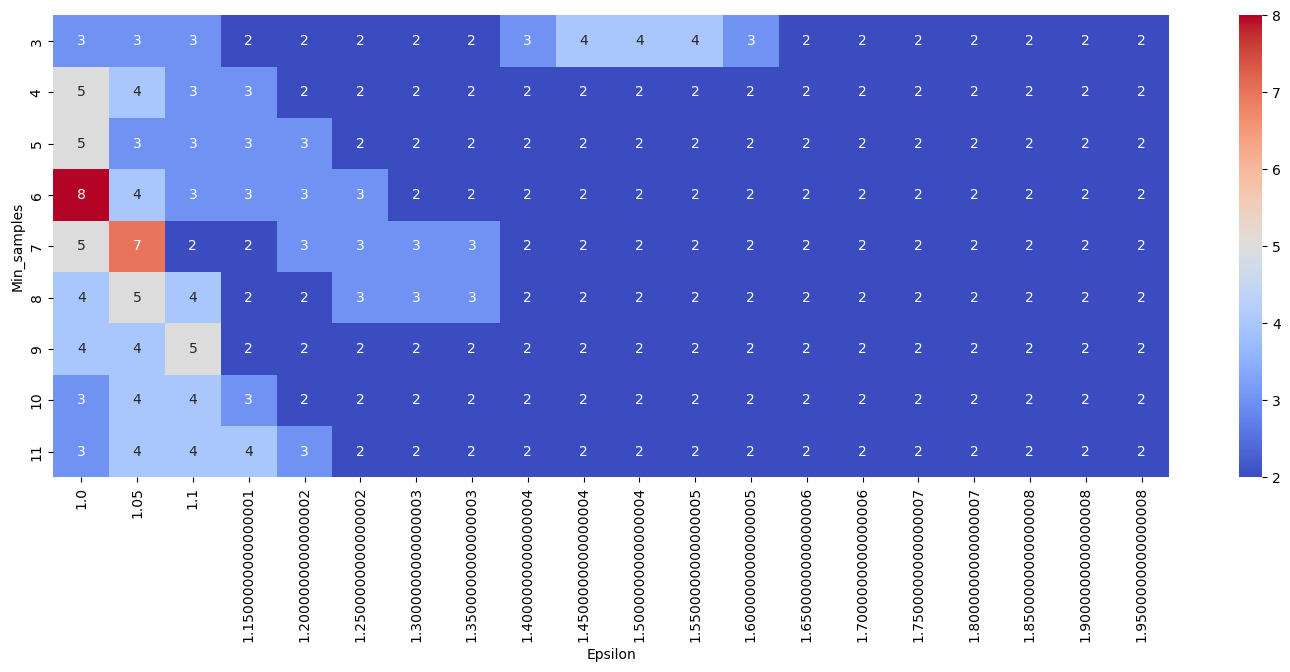

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [41]:
dbscan_train = DBSCAN(eps=1.65, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_Bogota_scaled)
print(silhouette_score(df_Bogota_scaled,y_dbscan ))
dict_ciudades['Bogotá, D.C.']['dbscan_cluster'] = y_dbscan

0.41675435020657825


In [42]:
dict_ciudades['Bogotá, D.C.']

,IPC_mensual,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M,dbscan_cluster
Fecha,,,,,,,,
2010-01,0.72,28.290323,14.572903,56.022581,0.420645,20.783871,2.373548,-1
2010-02,0.82,28.751429,16.600357,61.676429,1.567857,21.900000,1.888571,-1
2010-03,0.25,27.279032,16.360000,67.231613,3.154516,21.149677,1.497742,-1
2010-04,0.28,24.373000,15.902000,80.660667,8.706333,19.568000,1.303667,0
2010-05,0.23,23.441613,15.351613,82.858065,8.090323,18.984839,1.532258,0
...,...,...,...,...,...,...,...,...
2023-11,0.29,23.898333,15.323667,81.342333,5.673667,19.179333,1.609667,0
2023-12,0.48,24.404194,15.560968,80.679032,4.315161,19.542903,1.663548,0
2024-01,0.68,26.288387,14.625806,71.830645,0.619355,20.018710,2.215484,0


Cómo se agrupan los datos, en especial los del IPC vs los datos de temperatura (primera fila)

c:\Users\ajalvara\AppData\Local\mambaforge\envs\Asset_M\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



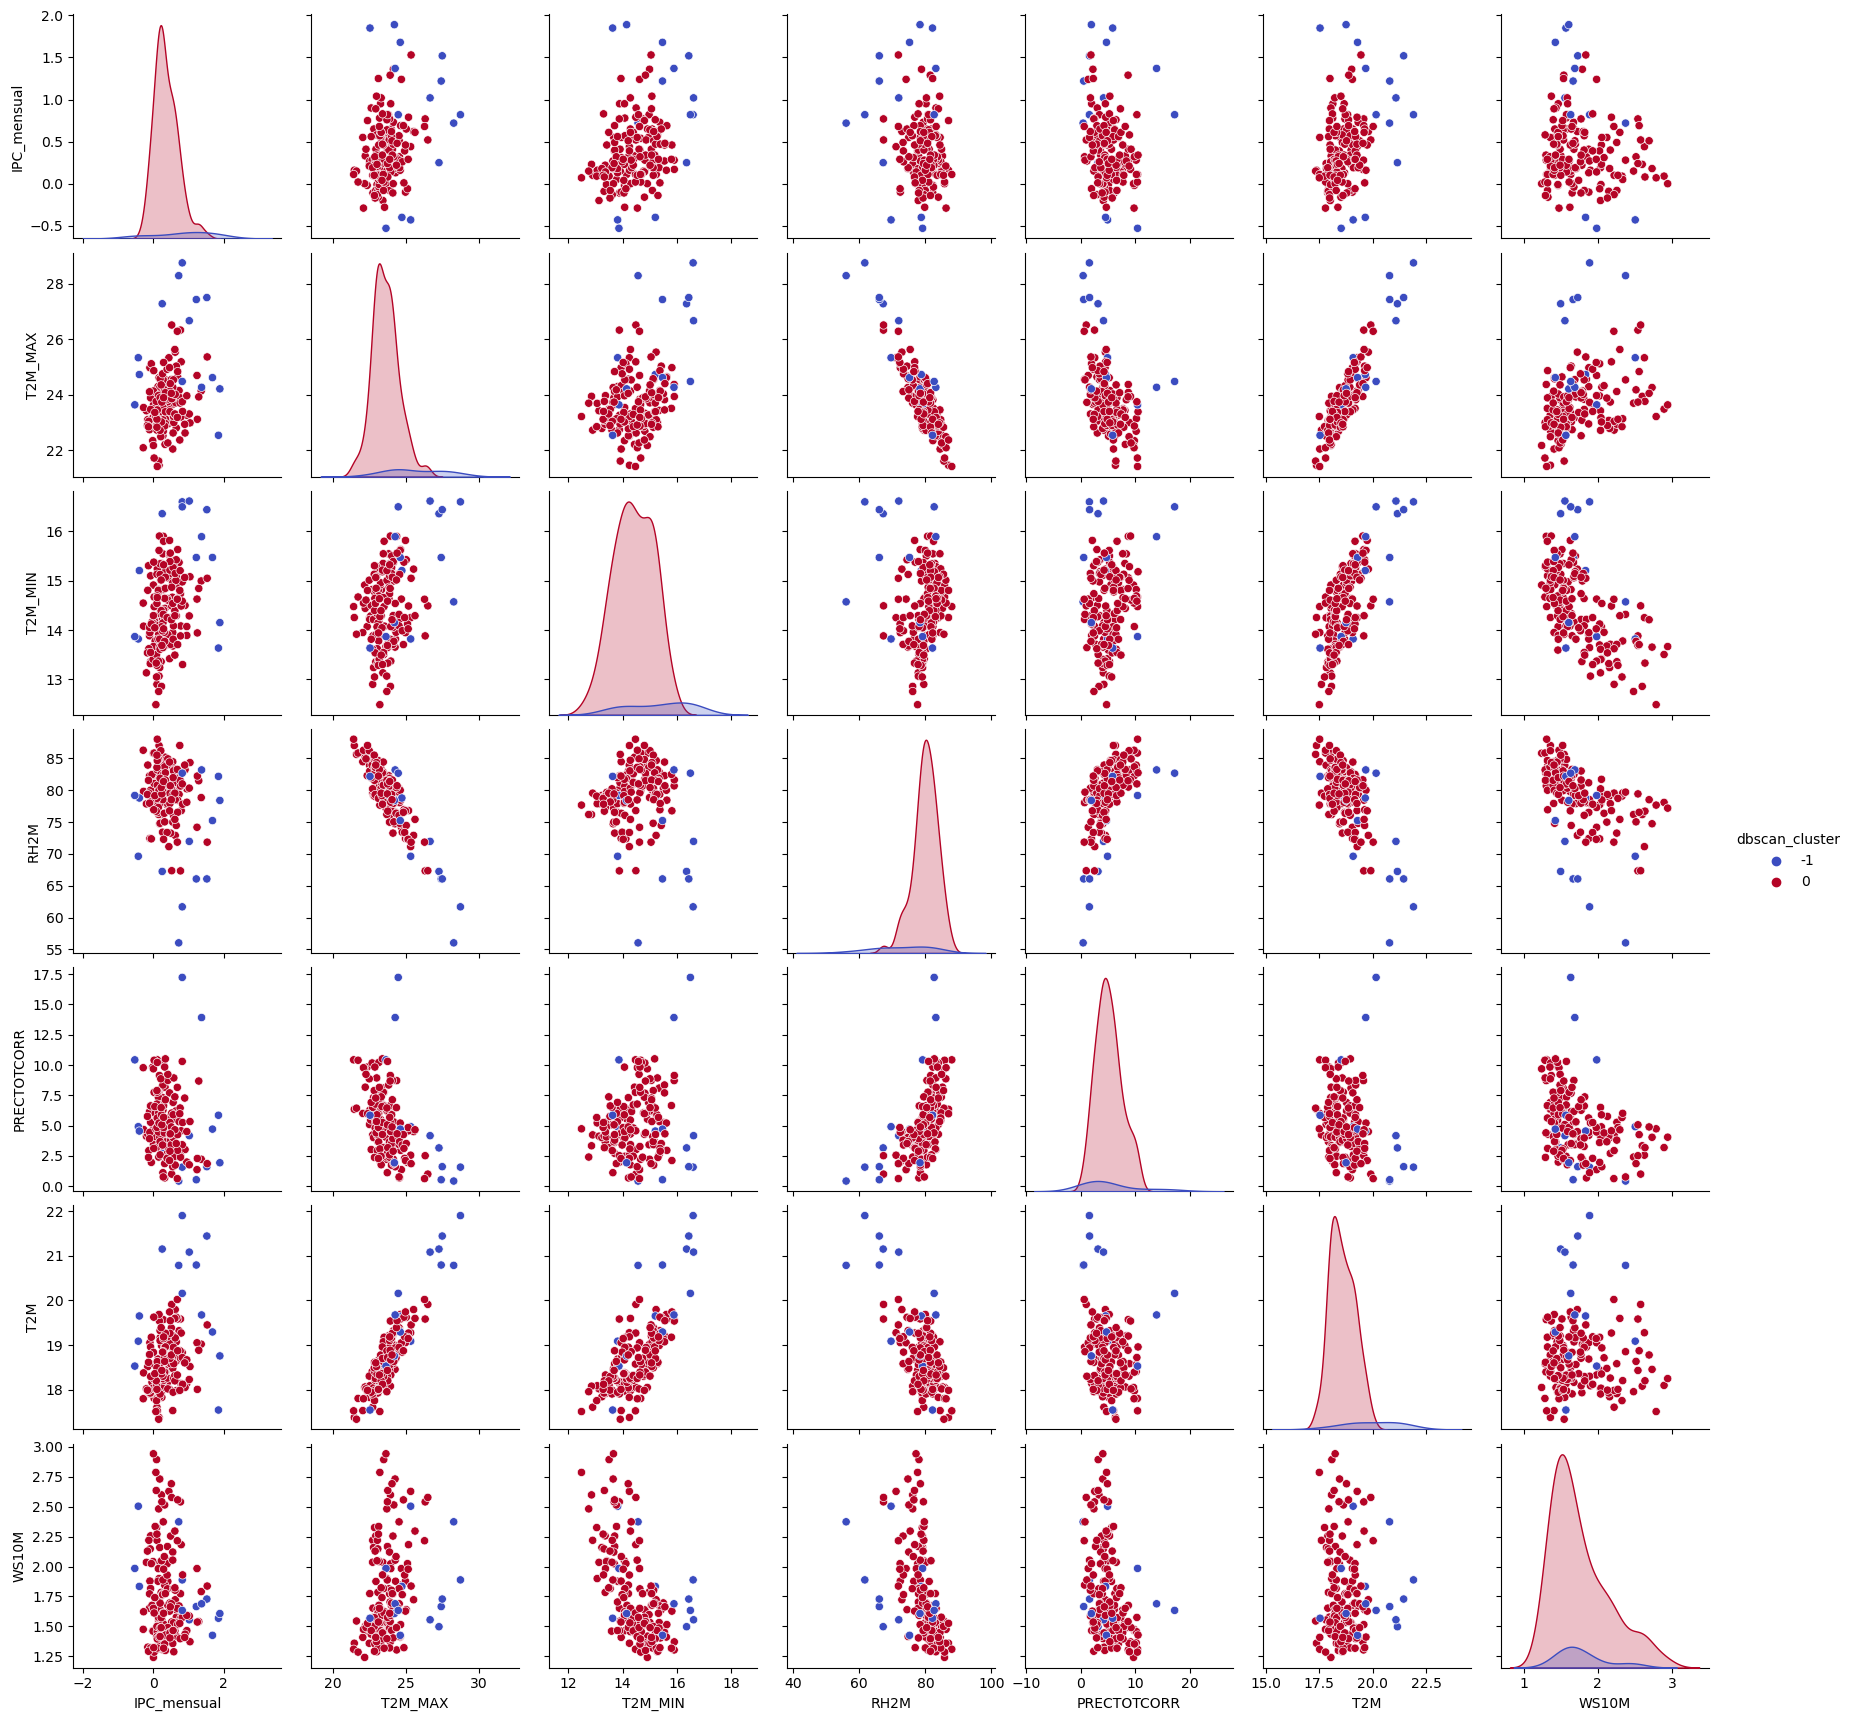

In [43]:
fig.figsize=(25,10)
sns.pairplot(data = dict_ciudades['Bogotá, D.C.'], hue='dbscan_cluster', palette='coolwarm')

### Con PCA

In [44]:
pca = PCA()
pca.fit(df_Bogota_scaled)
pca_Bogota_scaled = pca.transform(df_Bogota_scaled)
pca_Bogota_scaled

array([[ 6.93869154, -1.57364591, -0.73588749, ...,  1.3360209 ,
        -0.51924957, -0.04619501],
       [ 7.46886593,  1.59339289, -1.22731156, ...,  0.30044788,
        -0.20960463, -0.0683197 ],
       [ 4.97812585,  1.85412102, -1.88333265, ...,  0.53921906,
        -0.15103917, -0.03738152],
       ...,
       [ 3.74430416, -0.81380391,  0.09940482, ..., -0.30956924,
         0.43340638,  0.02505745],
       [ 0.24585275,  3.36691588,  0.26760154, ..., -0.40174338,
         0.21613166,  0.01963306],
       [ 0.13434611,  4.1710693 , -1.60992035, ..., -0.36734699,
         0.07042223,  0.07224246]])

In [45]:
var = pca.explained_variance_ratio_
print(var)

[0.46275518 0.30222629 0.12267758 0.07696453 0.0289108  0.00556389
 0.00090172]


Con cuantos componentes se obtiene el 85% de la varianza

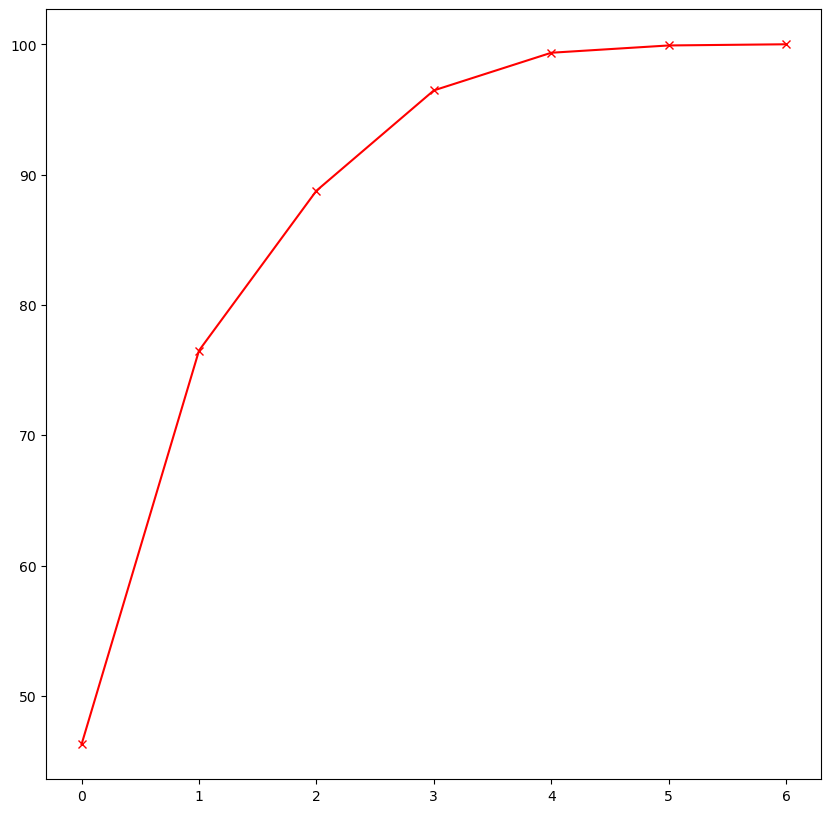

In [46]:
cum_var = np.cumsum(np.round(var, decimals=4)*100) 
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [47]:
pcs_needed = np.where(np.cumsum(pca.explained_variance_ratio_) >=.85)[0][0]
print("PC's necesarios para explicar el 85% de la varianza de los datos: ", pcs_needed)

PC's necesarios para explicar el 85% de la varianza de los datos:  2


Borrar las columnas 3 a 7

In [48]:
pca_bogota_standard = pd.DataFrame(pca_Bogota_scaled)
pca_bogota_standard.drop([3,4,5,6],axis=1, inplace=True)
pca_bogota_standard

,0,1,2
0,6.938692,-1.573646,-0.735887
1,7.468866,1.593393,-1.227312
2,4.978126,1.854121,-1.883333
3,0.345310,2.540765,-1.199690
4,-0.679404,1.558574,-0.801972
...,...,...,...
166,0.168379,1.159832,-0.527010
167,1.056467,1.306557,-0.214242
168,3.744304,-0.813804,0.099405
169,0.245853,3.366916,0.267602


In [49]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_bogota_standard)
dists, indices = neighbors_fit.kneighbors(pca_bogota_standard)

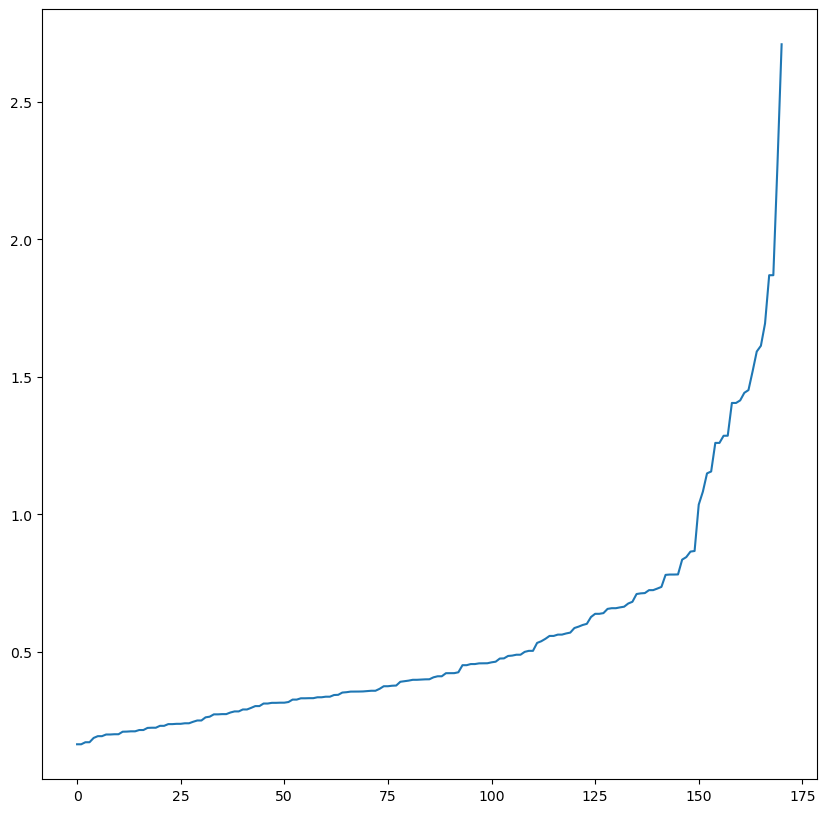

In [50]:
dists = np.sort(dists, axis=0)
dists = dists[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(dists)

In [51]:
epsilon_values = np.arange(0.5, 2.0, 0.05)
samples = np.arange(3,12)

In [52]:
dbscan_paramns = list(product(epsilon_values,samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_bogota_standard)
    try:
        sil_score.append(silhouette_score(pca_bogota_standard,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [53]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Epsilon','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [54]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Epsilon', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Epsilon', index='Min_samples')

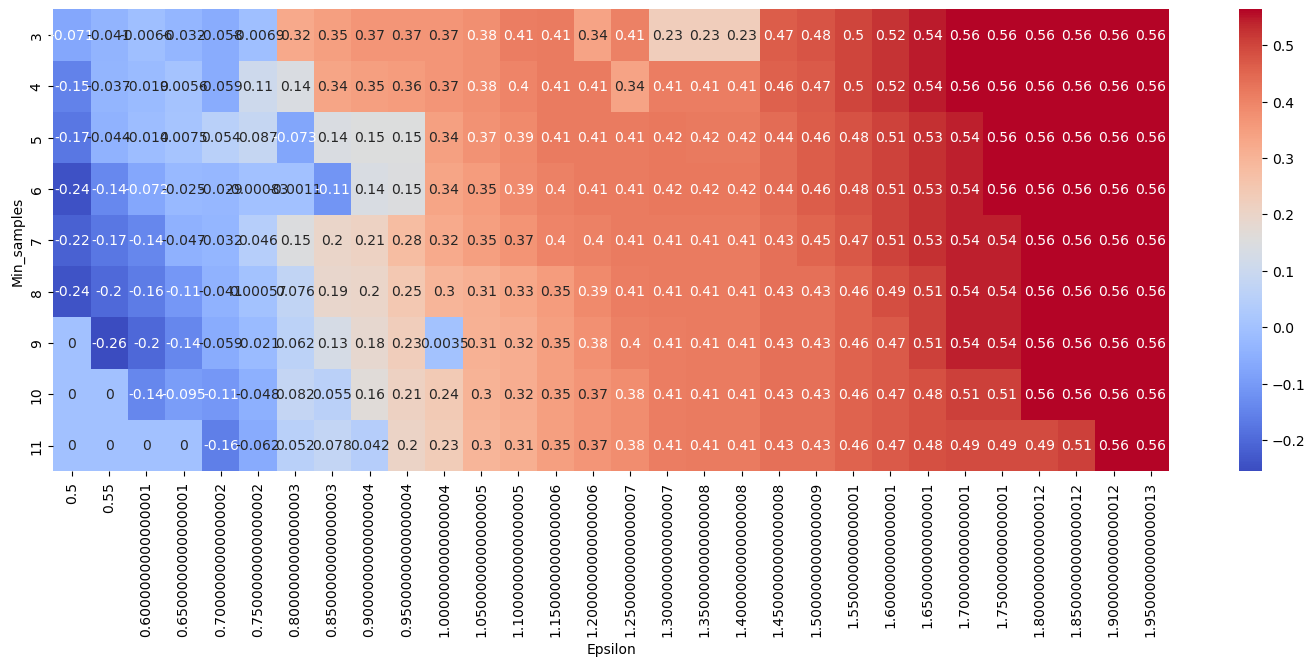

In [55]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

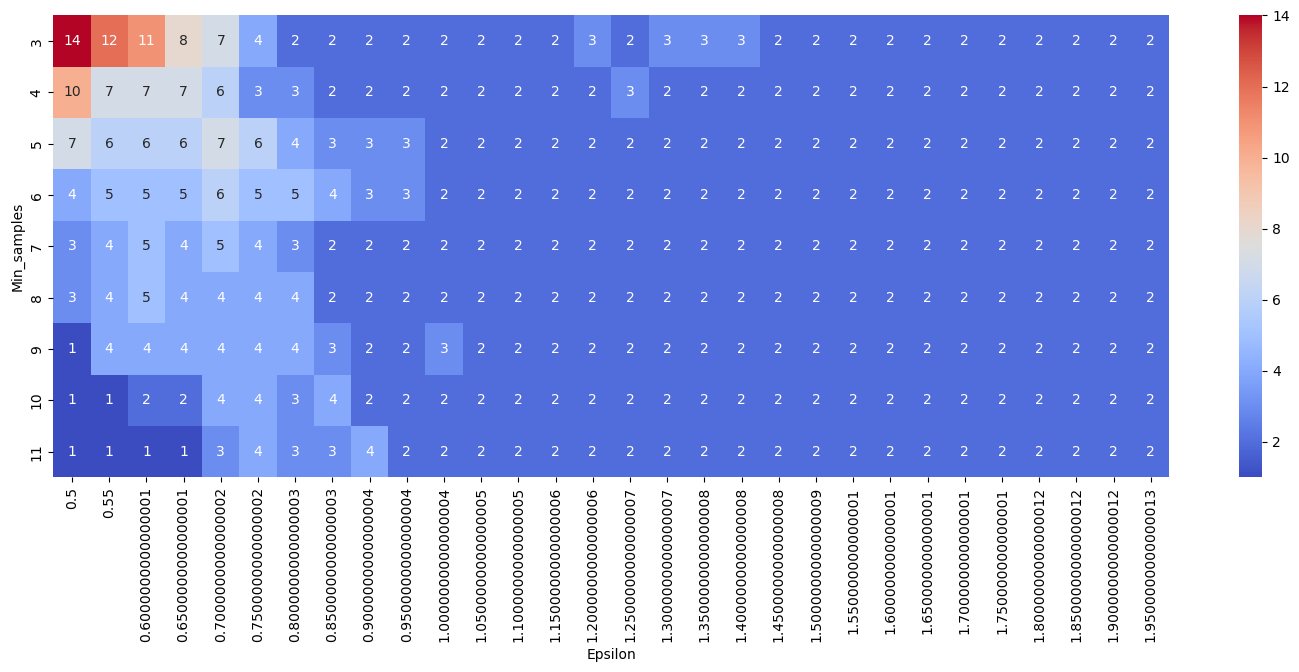

In [56]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [57]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_bogota_standard)
print(silhouette_score(pca_bogota_standard,y_dbscan ))
dict_ciudades['Bogotá, D.C.']['dbscan_pca'] = y_dbscan

0.5630876567421352


In [58]:
dict_ciudades['Bogotá, D.C.']

,IPC_mensual,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M,dbscan_cluster,dbscan_pca
Fecha,,,,,,,,,
2010-01,0.72,28.290323,14.572903,56.022581,0.420645,20.783871,2.373548,-1,-1
2010-02,0.82,28.751429,16.600357,61.676429,1.567857,21.900000,1.888571,-1,-1
2010-03,0.25,27.279032,16.360000,67.231613,3.154516,21.149677,1.497742,-1,-1
2010-04,0.28,24.373000,15.902000,80.660667,8.706333,19.568000,1.303667,0,0
2010-05,0.23,23.441613,15.351613,82.858065,8.090323,18.984839,1.532258,0,0
...,...,...,...,...,...,...,...,...,...
2023-11,0.29,23.898333,15.323667,81.342333,5.673667,19.179333,1.609667,0,0
2023-12,0.48,24.404194,15.560968,80.679032,4.315161,19.542903,1.663548,0,0
2024-01,0.68,26.288387,14.625806,71.830645,0.619355,20.018710,2.215484,0,0


c:\Users\ajalvara\AppData\Local\mambaforge\envs\Asset_M\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



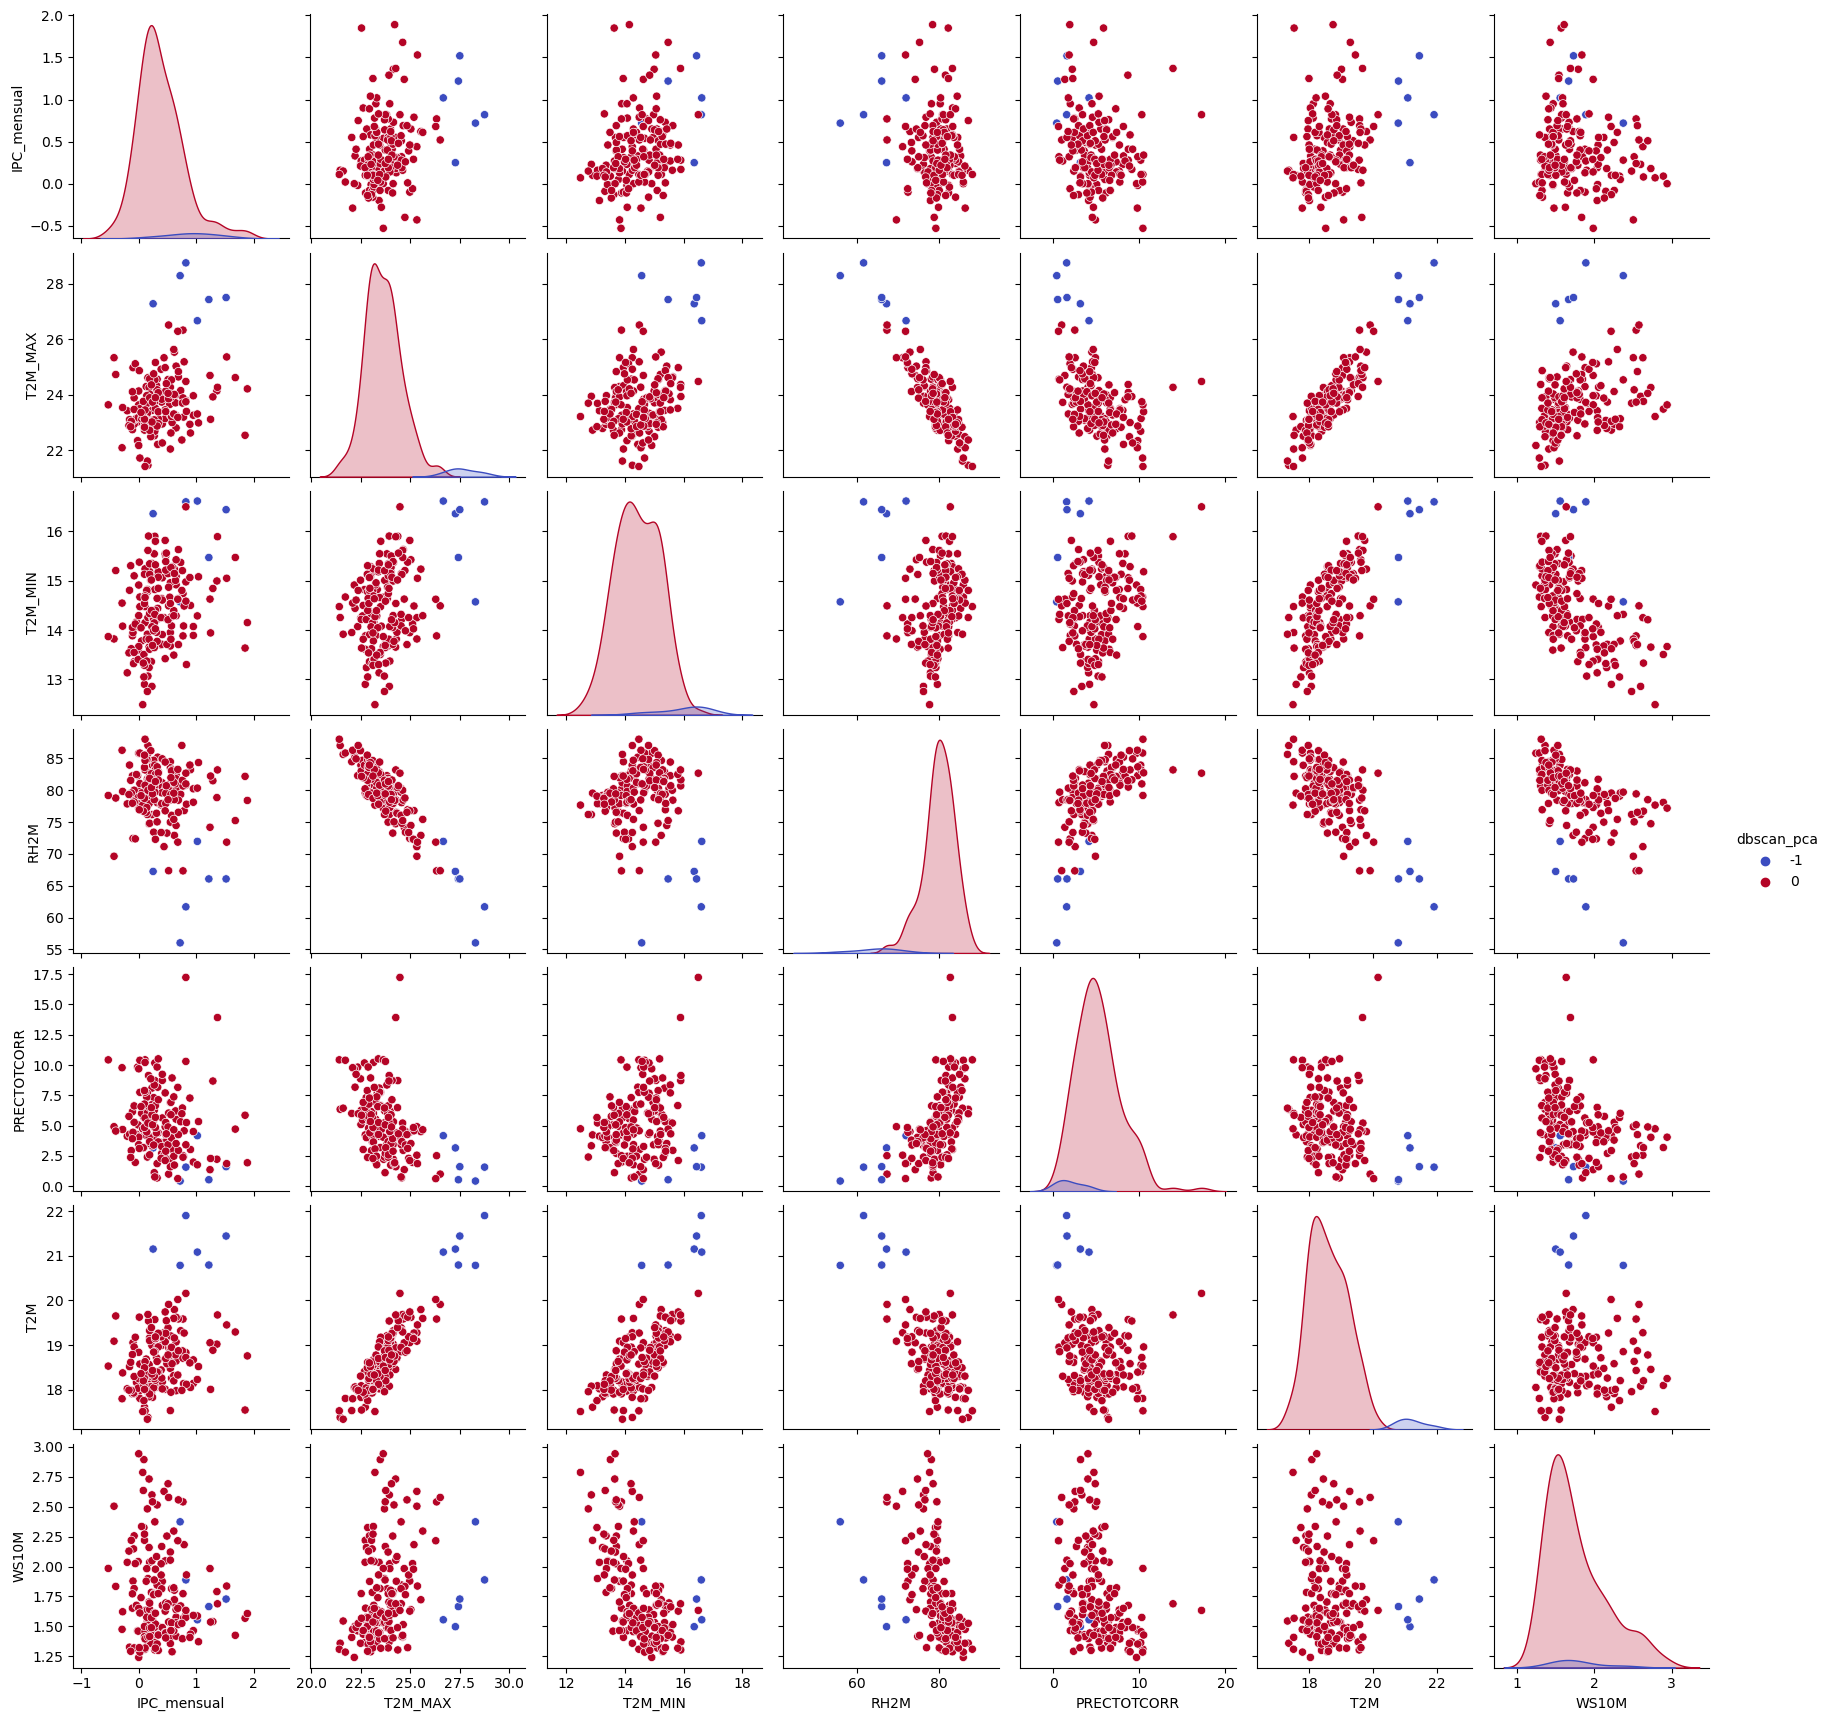

In [59]:
sns.pairplot(data = dict_ciudades['Bogotá, D.C.'][['IPC_mensual', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR',
       'T2M', 'WS10M', 'dbscan_pca']], hue='dbscan_pca', palette='coolwarm')

In [60]:
dict_ciudades['Bogotá, D.C.']

,IPC_mensual,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M,dbscan_cluster,dbscan_pca
Fecha,,,,,,,,,
2010-01,0.72,28.290323,14.572903,56.022581,0.420645,20.783871,2.373548,-1,-1
2010-02,0.82,28.751429,16.600357,61.676429,1.567857,21.900000,1.888571,-1,-1
2010-03,0.25,27.279032,16.360000,67.231613,3.154516,21.149677,1.497742,-1,-1
2010-04,0.28,24.373000,15.902000,80.660667,8.706333,19.568000,1.303667,0,0
2010-05,0.23,23.441613,15.351613,82.858065,8.090323,18.984839,1.532258,0,0
...,...,...,...,...,...,...,...,...,...
2023-11,0.29,23.898333,15.323667,81.342333,5.673667,19.179333,1.609667,0,0
2023-12,0.48,24.404194,15.560968,80.679032,4.315161,19.542903,1.663548,0,0
2024-01,0.68,26.288387,14.625806,71.830645,0.619355,20.018710,2.215484,0,0


In [61]:
dict_ciudades['Bogotá, D.C.'].iloc[:,:-2]

,IPC_mensual,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M
Fecha,,,,,,,
2010-01,0.72,28.290323,14.572903,56.022581,0.420645,20.783871,2.373548
2010-02,0.82,28.751429,16.600357,61.676429,1.567857,21.900000,1.888571
2010-03,0.25,27.279032,16.360000,67.231613,3.154516,21.149677,1.497742
2010-04,0.28,24.373000,15.902000,80.660667,8.706333,19.568000,1.303667
2010-05,0.23,23.441613,15.351613,82.858065,8.090323,18.984839,1.532258
...,...,...,...,...,...,...,...
2023-11,0.29,23.898333,15.323667,81.342333,5.673667,19.179333,1.609667
2023-12,0.48,24.404194,15.560968,80.679032,4.315161,19.542903,1.663548
2024-01,0.68,26.288387,14.625806,71.830645,0.619355,20.018710,2.215484


## Modelo predictivo utilizando Random Forest con Todas las Características

### Crear una columna categórica para IPC Mensual

In [62]:
# Definir las características y la variable objetivo
features = ['PRECTOTCORR', 'T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'WS10M']
target = 'IPC_mensual'

In [63]:
# (Bajo = 0, Medio = 1, Alto = 2)
df_Bogota_scaled['IPC_Category'] = pd.qcut(df_Bogota_scaled[target], q=3, labels=[0, 1, 2])
df_Bogota_scaled.head(10)

,IPC_mensual,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M,IPC_Category
0,0.780385,3.865825,0.110786,-4.954642,-1.777418,2.756768,1.591730,2
1,1.019322,4.260762,2.623684,-3.752038,-1.344489,4.230635,0.328666,2
2,-0.342615,2.999655,2.325777,-2.570421,-0.745723,3.239822,-0.689201,1
3,-0.270934,0.510638,1.758115,0.286011,1.349396,1.151191,-1.194647,1
4,-0.390402,-0.287095,1.075946,0.753410,1.116929,0.381117,-0.599308,1
5,-0.677126,-0.569408,-0.413376,0.234749,0.161167,-0.470843,-0.334334,0
6,-0.987743,-1.221508,-0.510531,0.628874,1.769301,-0.963254,-0.779094,0
7,-0.414296,-0.591567,-1.390531,0.000090,-0.552774,-1.014797,0.056827,1
8,-0.963849,-0.642211,-1.100849,0.109111,-0.028653,-1.005212,-0.785759,0
9,-1.202785,-0.883053,-0.741626,0.620160,0.380925,-1.048448,-0.285943,0


### Distribución de la columna IPC_Category.

Balanceo de Clases

In [64]:
df_Bogota_scaled['IPC_Category'].value_counts()

IPC_Category
0    57
1    57
2    57
Name: count, dtype: int64

### Dividir el Dataframe

In [65]:
X = df_Bogota_scaled[features]
y = df_Bogota_scaled['IPC_Category']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Encontrar los mejores Hiperparametros con validación cruzada.

In [66]:
rf = RandomForestClassifier(random_state=42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [67]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'], # Criterio para medir la calidad de una división
    'n_estimators': [100, 200, 300], # Número de árboles en el bosque
    'max_depth': [None, 5, 10], # Profundidad máxima de los árboles
    'max_samples': [None, 0.5, 0.8], # Porcentaje de muestras a considerar
    'min_samples_split': [2, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator = rf, # Modelo a ajustar
                           param_grid = param_grid, # Hiperparámetros a ajustar
                           cv = 5, # Número de divisiones para la validación cruzada  
                           scoring='accuracy', # Métrica a optimizar
                           )

In [68]:
# Ajustar el modelo
grid_search.fit(X_train, y_train) 

# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 100}


### Evaluar el mejor modelo en el conjunto de prueba

In [69]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.5428571428571428
Test Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.36      0.36      0.36        11
           2       0.71      0.56      0.63         9

    accuracy                           0.54        35
   macro avg       0.56      0.53      0.54        35
weighted avg       0.55      0.54      0.54        35



### Evaluar el Modelo

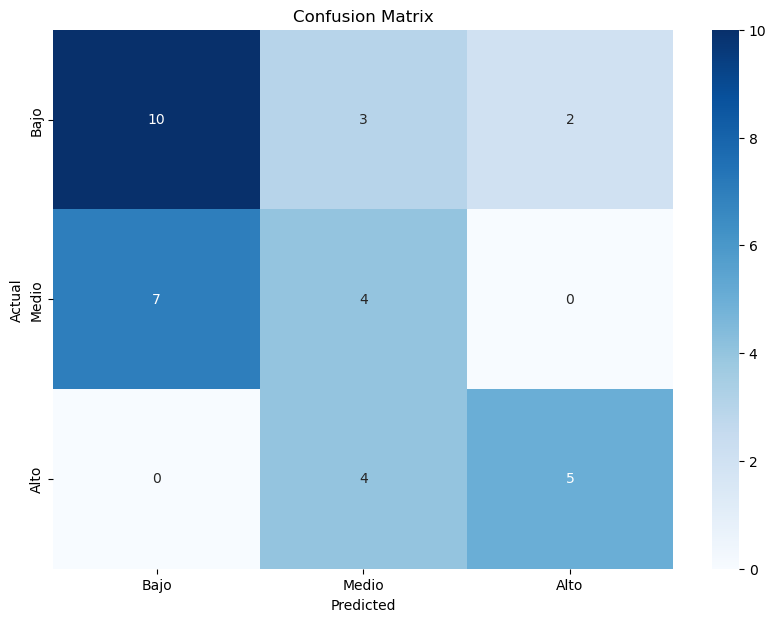

In [70]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Medio', 'Alto'], yticklabels=['Bajo', 'Medio', 'Alto'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Interpretación de la Importancia de las Características

             importance
T2M            0.181323
T2M_MIN        0.178954
PRECTOTCORR    0.171131
WS10M          0.162625
T2M_MAX        0.155549
RH2M           0.150417


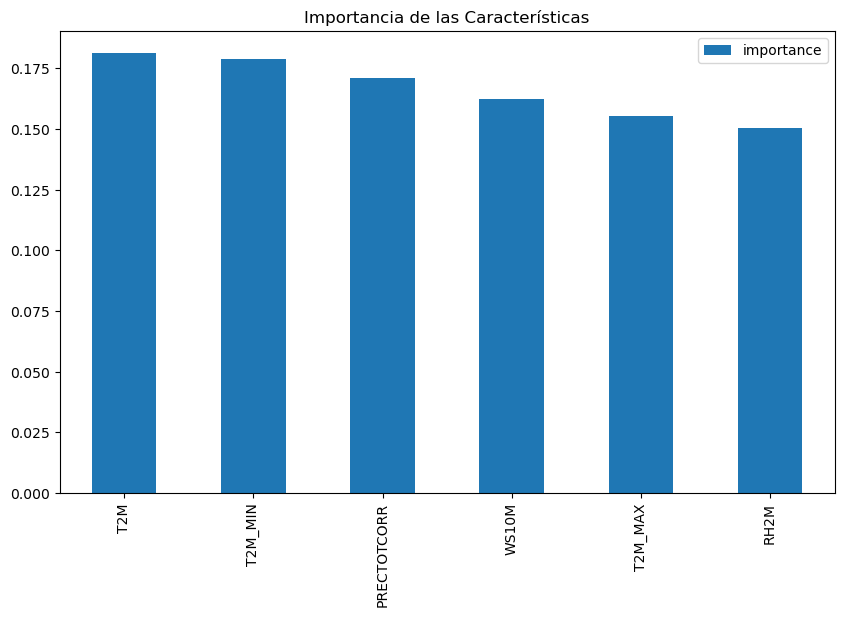

In [71]:
# Importancia de las características
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Visualización de la importancia de las características
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Importancia de las Características')
plt.show()

## Modelo predictivo utilizando Random Forest sin Todas las Características

### Crear una columna categórica para IPC Mensual

In [72]:
# Definir las características y la variable objetivo
features = ['PRECTOTCORR', 'T2M', 'RH2M', 'WS10M']

### Dividir el Dataframe

In [73]:
X = df_Bogota_scaled[features]
y = df_Bogota_scaled['IPC_Category']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Encontrar los mejores Hiperparametros con validación cruzada.

In [74]:
rf = RandomForestClassifier(random_state=42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [75]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'], # Criterio para medir la calidad de una división
    'n_estimators': [100, 200, 300], # Número de árboles en el bosque
    'max_depth': [None, 5, 10], # Profundidad máxima de los árboles
    'max_samples': [None, 0.5, 0.8], # Porcentaje de muestras a considerar
    'min_samples_split': [2, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator = rf, # Modelo a ajustar
                           param_grid = param_grid, # Hiperparámetros a ajustar
                           cv = 5, # Número de divisiones para la validación cruzada  
                           scoring='accuracy', # Métrica a optimizar
                           )

In [76]:
# Ajustar el modelo
grid_search.fit(X_train, y_train) 

# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_samples': 0.8, 'min_samples_split': 2, 'n_estimators': 100}


### Evaluar el mejor modelo en el conjunto de prueba

In [77]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.5428571428571428
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.36      0.45      0.40        11
           2       0.56      0.56      0.56         9

    accuracy                           0.54        35
   macro avg       0.55      0.54      0.54        35
weighted avg       0.58      0.54      0.55        35



### Evaluar el Modelo

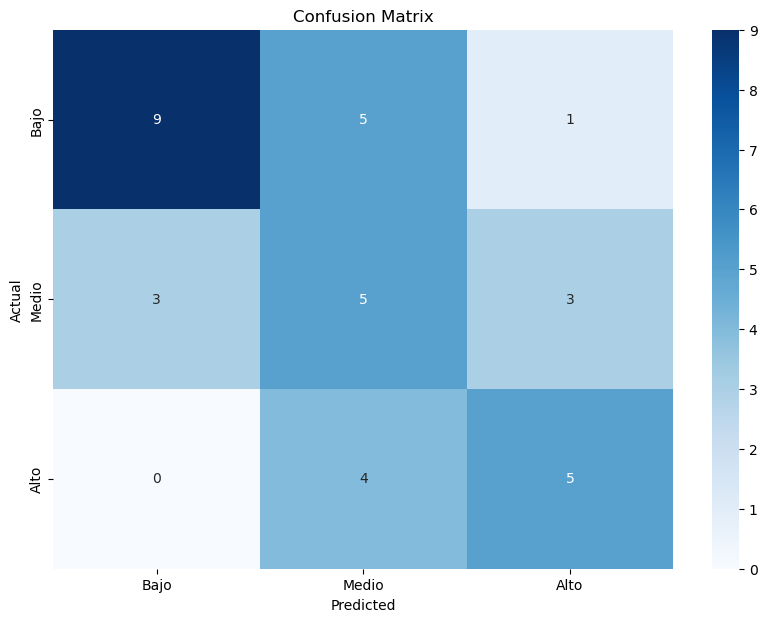

In [78]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Medio', 'Alto'], yticklabels=['Bajo', 'Medio', 'Alto'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Interpretación de la Importancia de las Características

             importance
T2M            0.301530
RH2M           0.236419
WS10M          0.233419
PRECTOTCORR    0.228632


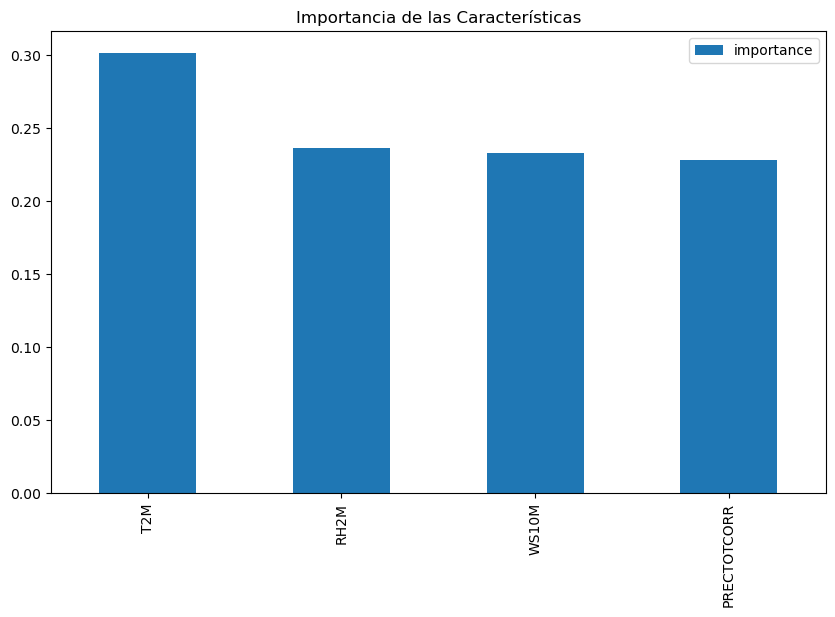

In [79]:
# Importancia de las características
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Visualización de la importancia de las características
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Importancia de las Características')
plt.show()